# Hello MNIST!

In this notebook, you'll learn how to train an image classifier train on the MNIST dataset - the "hello world" of computer vision. You'll go through all the steps, including loading the data, building and training a model.




Let us start with downloading the MNIST dataset and loading necessary libraries.

## Step 1) Load the dataset

The MNIST dataset contains thousands of grayscale images of handwritten digits. There are ten distinct categories, coresponding to numbers 0 - 9.

In [ ]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist     
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Dropout, Activation 
from tensorflow.keras.utils import to_categorical 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


0


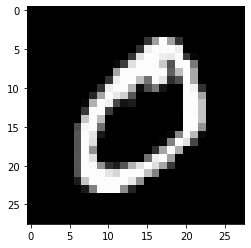

In [ ]:
# get one image
print(y_train[1])
plt.imshow(x_train[1], cmap='gray', interpolation='none');

In [ ]:
# flatten the arrays to fit into the first layer of our neural network
x_train = x_train.reshape(60000, 28*28) 
x_test = x_test.reshape(10000, 28*28)   

# normalize values to [0,1]
x_train = x_train / 255                       
x_test = x_test / 255

print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
nb_classes = 10

y_train_onehot = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, nb_classes)

y_test[1], y_test_onehot[1]

(2, array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

## Step 2) Visualize the data

Show a random sample of the dataset along with it's corresponding labels:


In [ ]:
indices = np.random.choice(range(60000), 9)

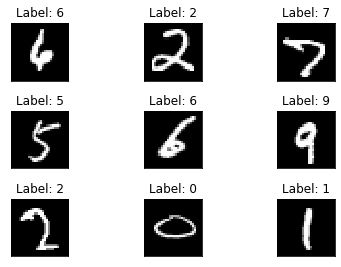

In [ ]:
fig = plt.figure()
for i, ind in enumerate(indices):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[ind].reshape((28,28)), cmap='gray', interpolation='none')
  plt.title(f"Label: {y_train[ind]}")
  plt.xticks([])
  plt.yticks([])

## Step 3) Build the model

Architecture wise, we'll use a single layer network. All layers are Linear - the classic fully-connected neural network layers.
* The hidden layer will have 512 units using the ReLU activation function.
* The output layer will have 10 units, corresponding to the 10 digits, and use softmax function. 


In [ ]:
model = Sequential([
    Dense(512, input_shape=(784,), activation="relu"),
    Dense(512, activation="relu"),
    Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Step 4) Training


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In each epoch, we will go through all data and print the loss and metrics.

In [ ]:
model.fit(x_train, y_train_onehot,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.2146 - accuracy: 0.9369
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0801 - accuracy: 0.9753
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0518 - accuracy: 0.9835
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0356 - accuracy: 0.9884
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0284 - accuracy: 0.9904


How are we doing on a testing set?

In [ ]:
score = model.evaluate(x_test, y_test_onehot)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0647 - accuracy: 0.9824
Test loss: 0.06468968838453293
Test accuracy: 0.9824000000953674
